# Import Libraries

In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Download Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# Plot Examples

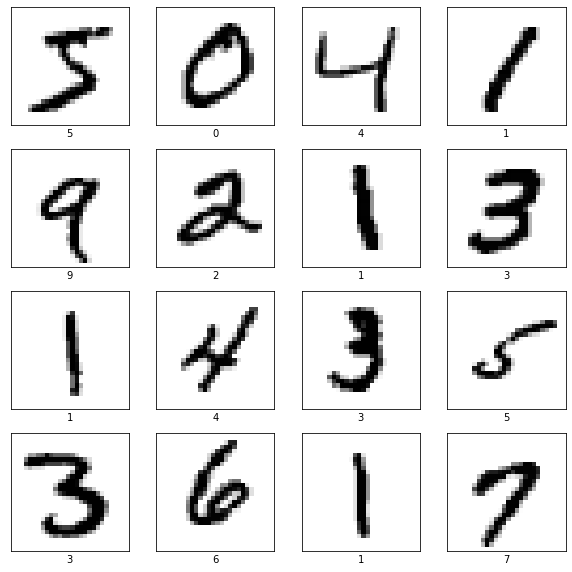

In [3]:
plt.figure(figsize=(10, 10))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i], cmap='binary')
    plt.xlabel(str(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

# Normalize Data

In [4]:
x_train = np.reshape(x_train, (60000, 784))
x_train = x_train / 255.

x_test = np.reshape(x_test, (10000, 784))
x_test = x_test / 255.

# Create a Neural Network Model

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='sigmoid', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Model

In [6]:
_ = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50, batch_size=1024,
    verbose=2
)

Epoch 1/20
59/59 - 1s - loss: 2.1740 - accuracy: 0.3771 - val_loss: 1.9758 - val_accuracy: 0.5691
Epoch 2/20
59/59 - 0s - loss: 1.7945 - accuracy: 0.6146 - val_loss: 1.5901 - val_accuracy: 0.6796
Epoch 3/20
59/59 - 0s - loss: 1.4178 - accuracy: 0.7317 - val_loss: 1.2316 - val_accuracy: 0.7926
Epoch 4/20
59/59 - 0s - loss: 1.0922 - accuracy: 0.8144 - val_loss: 0.9433 - val_accuracy: 0.8434
Epoch 5/20
59/59 - 0s - loss: 0.8458 - accuracy: 0.8533 - val_loss: 0.7391 - val_accuracy: 0.8720
Epoch 6/20
59/59 - 0s - loss: 0.6751 - accuracy: 0.8736 - val_loss: 0.6011 - val_accuracy: 0.8850
Epoch 7/20
59/59 - 0s - loss: 0.5595 - accuracy: 0.8858 - val_loss: 0.5079 - val_accuracy: 0.8931
Epoch 8/20
59/59 - 0s - loss: 0.4809 - accuracy: 0.8944 - val_loss: 0.4439 - val_accuracy: 0.9012
Epoch 9/20
59/59 - 0s - loss: 0.4257 - accuracy: 0.9017 - val_loss: 0.3987 - val_accuracy: 0.9065
Epoch 10/20
59/59 - 0s - loss: 0.3849 - accuracy: 0.9075 - val_loss: 0.3642 - val_accuracy: 0.9119
Epoch 11/20
59/59 -

# Save the Model

In [7]:
model.save('model.h5')